<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/FA_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factor Analysis

Adapted from The E-Learning project SOGA-Py was developed at the Department of Earth Sciences by Annette Rudolph, Joachim Krois and Kai Hartmann. You can reach us via mail by soga[at]zedat.fu-berlin.de.

Factor analysis is an application of latent variable models. The purpose of the analysis is to determine how many latent variables are needed to explain the correlations between the manifest variable, to interpret them and, sometimes, to predict the values of the latent variables which have given rise to the manifest variables.

The basic idea behind factor analysis is that we investigate a multivariate feature space covered by a set of observable variables and that we describe the variability and correlation among the observed variables in terms of a potentially lower number of unobserved variables denoted as factors.

There are two main branches of factor analysis:

- [Confirmatory factor analysis (CFA)](https://en.wikipedia.org/wiki/Confirmatory_factor_analysis)

- [Exploratory factor analysis (EFA)](https://en.wikipedia.org/wiki/Exploratory_factor_analysis)

In EFA we allow all *m* factors to be related to all *p* observed variables. Thus, one can say that we are exploring which factors relate to which observed variables. Whereas in CFA we know, or assume, based on an a priori hypothesized model that *k* observed variables are related to a particular factor (latent variable). Thus, one can say we try to confirm if a set of *k* observed variables is in fact related to a particular factor.

Read more on the math behind Factor analysis on the studium page.

In the following tutorial, we focus on **exploratory factor analysis**.

# Factor Analysis in Python


In this example we compute a factor analysis, employing the `scikit-learn` library.

We assume that our data was generated by a linear transformation of a lower dimensional data set, with an overlay of white noise. The factor analysis allows us to retrieve these underlying factors and thus to lower the dimensionality of our data.

Let's import the needed tools and get going. We will give further explanation along the way.


In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## The data set
Let us get our hands dirty and apply a factor analysis on a the food-texture data set. We already discussed the data set in the section on principal component analysis, so you are probably familiar with the data set.

For convenience, we use gain the "pastry" dataset we earölier encountered in the PCA tutorial.

In [ ]:
food = read_csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv", index_col=0)
food.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


The data set consists of 50 rows (observations) and 5 columns (features/variables). The features are:

- Oil: percentage oil in the pastry
- Density: the product’s density (the higher the number, the more dense the product)
- Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
- Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
- Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

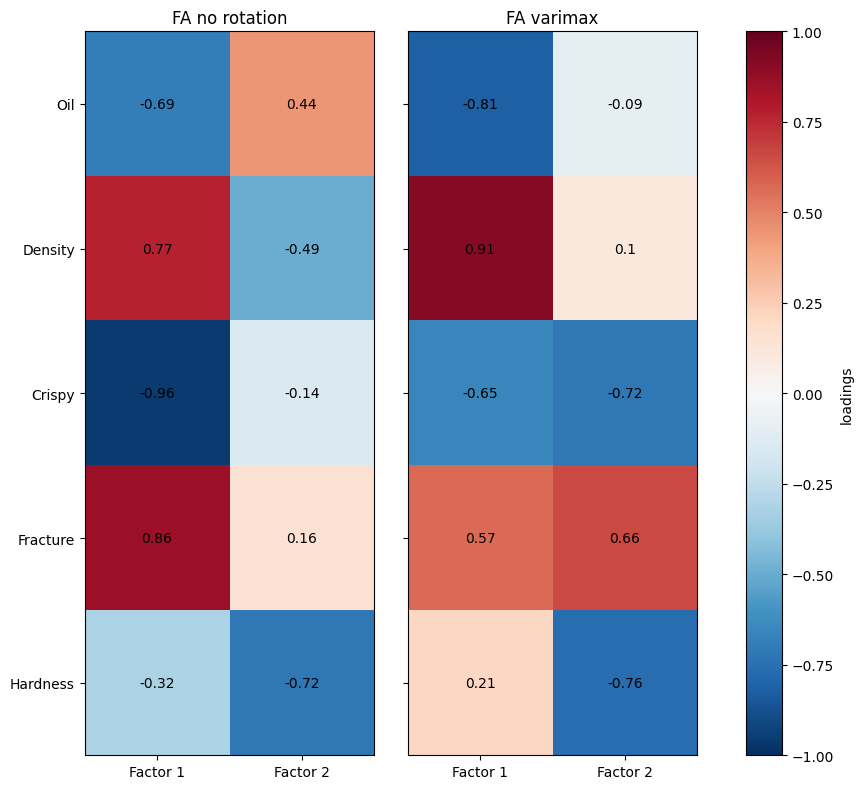

In [ ]:
X = StandardScaler().fit_transform(food)  # Standardize the data
factors = 2 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(food.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(food.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

<Axes: ylabel='Uniqueness'>

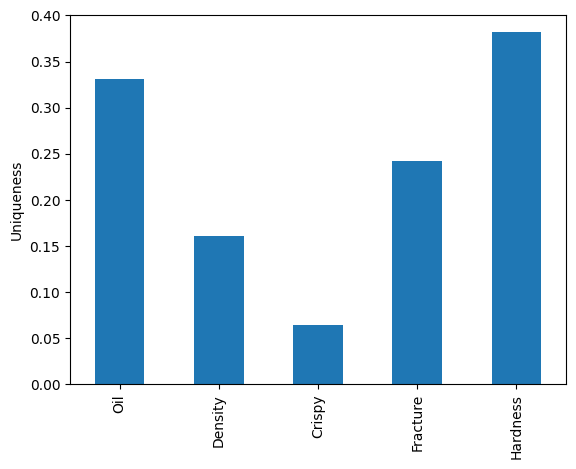

In [ ]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=food.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

<Axes: ylabel='communality'>

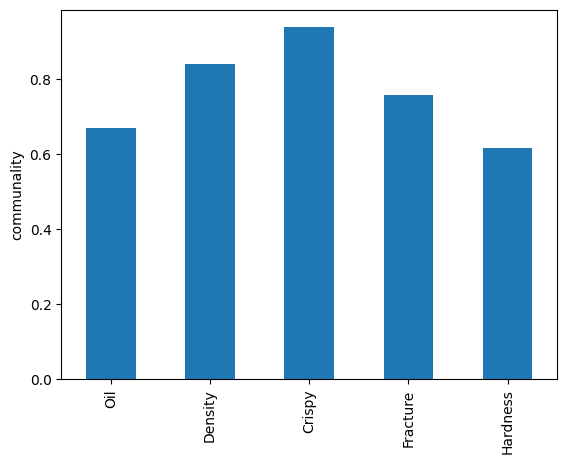

In [ ]:
# Communality
communality = Series(np.square(fa.components_.T).sum(axis=1), index=food.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

<Axes: ylabel='uniqueness'>

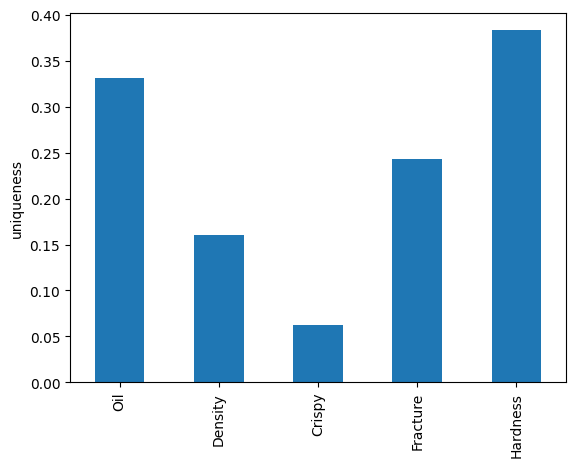

In [ ]:
#and back to uniqueness
(1 - communality).plot(kind="bar", ylabel="uniqueness")

In [ ]:
# the word 'lambda' is reserved for a python-operator, so we use the underscore at the end
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

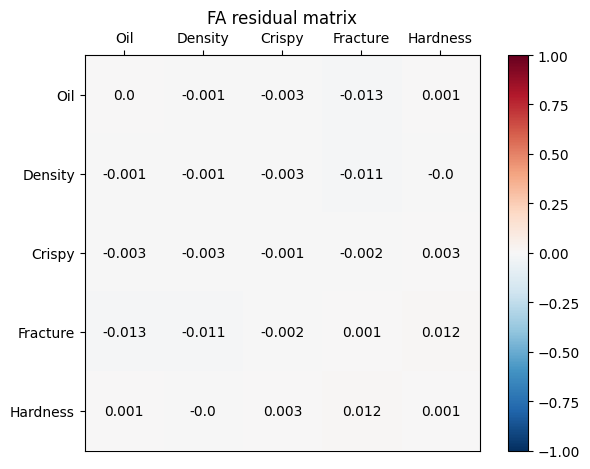

In [ ]:
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(5))
ax.set_xticklabels(food.columns)
ax.set_yticks(range(5))
ax.set_yticklabels(food.columns)
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

fig.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

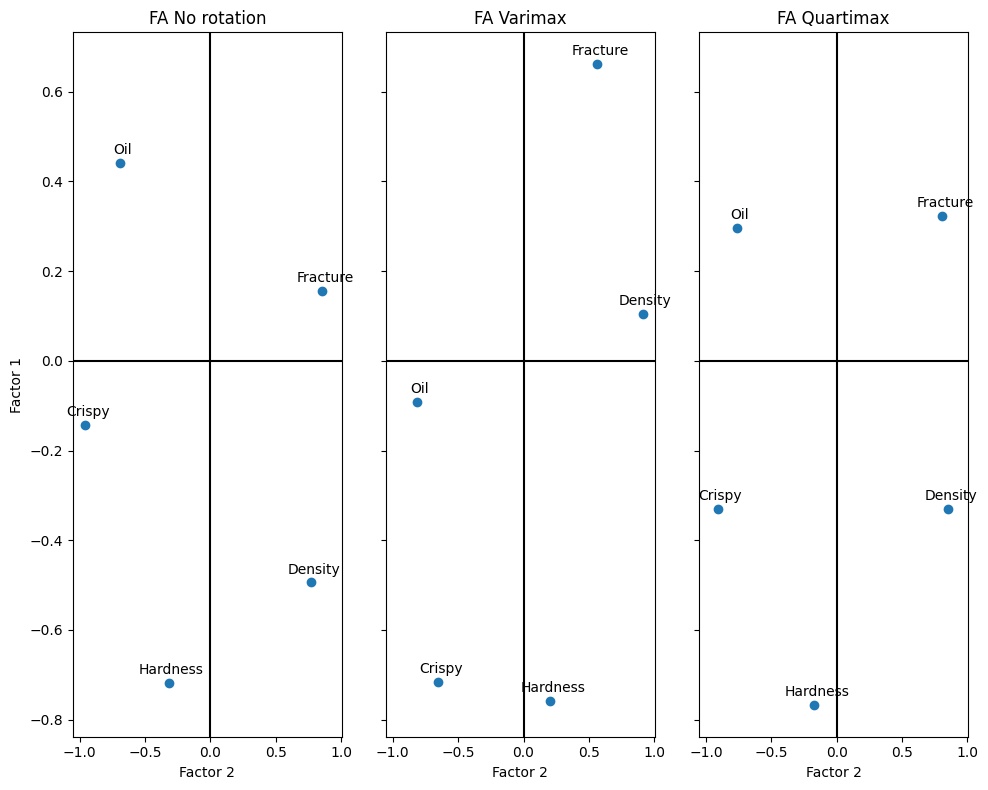

In [ ]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], food.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()